# ANALYSIS OF COVID-19 CASES IN INDIA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## DATASET SHOWING US THE CURRENT STATUS OF THE COVID-19 CASES

In [3]:
data=pd.read_csv("covid_india.csv")

## VIEWING TOP 5 ROWS OF THE DATASET

In [6]:
data.head()

,S. No.,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,1,Andaman and Nicobar,15,7339,128,7482
1,2,Andhra Pradesh,33964,1858189,12870,1905023
2,3,Arunachal Pradesh,3118,34234,179,37531
3,4,Assam,23590,491561,4683,519834
4,5,Bihar,1305,711692,9606,722603


## INFORMATION OF THE FILE

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S. No.                     36 non-null     int64 
 1   Name of State / UT         36 non-null     object
 2   Active Cases               36 non-null     int64 
 3   Cured/Discharged/Migrated  36 non-null     int64 
 4   Deaths                     36 non-null     int64 
 5   Total Confirmed cases      36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


## DESCRIPTION OF THE FILE

In [21]:
data.describe()

,S. No.,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
count,36.000000,36.000000,3.600000e+01,36.000000,3.600000e+01
mean,18.500000,12898.805556,8.264526e+05,11202.250000,8.505537e+05
std,10.535654,26547.355493,1.176153e+06,21295.260839,1.219207e+06
min,1.000000,15.000000,7.339000e+03,4.000000,7.482000e+03
25%,9.750000,1107.750000,5.728025e+04,781.000000,5.928025e+04
50%,18.500000,2149.500000,4.159090e+05,4513.000000,4.329085e+05
75%,27.250000,7406.500000,9.514070e+05,13016.750000,9.636010e+05
max,36.000000,120061.000000,5.861720e+06,123136.000000,6.104917e+06


In [10]:
data.columns.values      

array(['S. No.', 'Name of State / UT', 'Active Cases',
       'Cured/Discharged/Migrated', 'Deaths', 'Total Confirmed cases'],
      dtype=object)

In [11]:
data.index

RangeIndex(start=0, stop=36, step=1)

In [26]:
df.shape

(247236, 23)

# CLEANING OF DATA

In [31]:
data.set_index('S. No.',inplace=True)

In [32]:
data.rename(columns={'Cured/Discharged/Migrated':'Cured'},inplace='True')
data.head(2)

,Name of State / UT,Active Cases,Cured,Deaths,Total Confirmed cases
S. No.,,,,,
1,Andaman and Nicobar,15,7339,128,7482
2,Andhra Pradesh,33964,1858189,12870,1905023


## VIEWING NAN VALUES

In [33]:
data.isnull().sum()

Name of State / UT       0
Active Cases             0
Cured                    0
Deaths                   0
Total Confirmed cases    0
dtype: int64

## REPRESENTATION OF TOTAL CONFIRMED CASES WITH RESPECT TO EACH STATES 

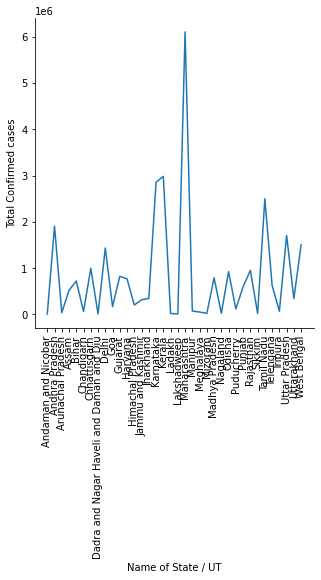

In [72]:
sns.relplot(data=data, x="Name of State / UT", y="Total Confirmed cases", kind='line')
plt.xticks(rotation=90)
plt.show()

## VIEWING TOP 20 STATES WITH HIGEST NUMBER OF COVID CASES

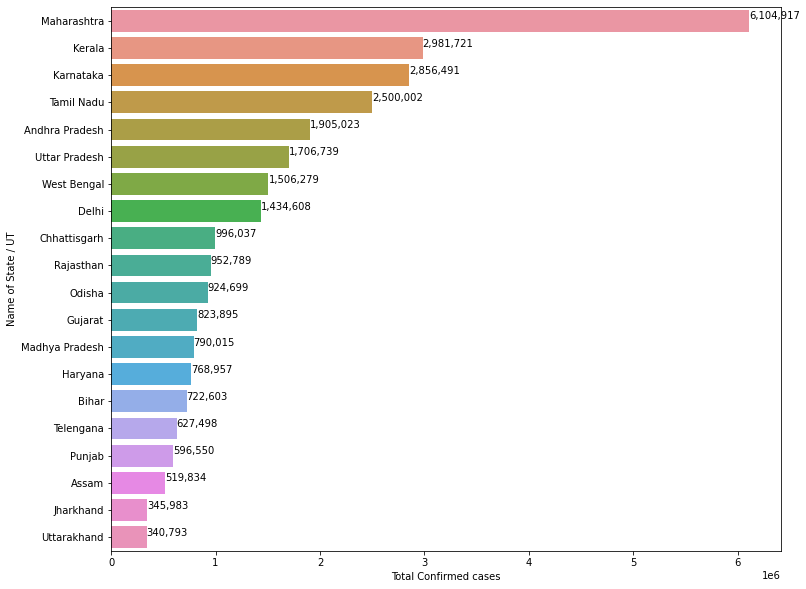

In [4]:
top_20 = data.sort_values(by=['Total Confirmed cases'], ascending=False).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Total Confirmed cases'], top_20['Name of State / UT'])
for i,(value,name) in enumerate(zip(top_20['Total Confirmed cases'],top_20['Total Confirmed cases'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

## VIEWING TOTAL NUMBER OF DEATH CASES WITH RESPECT TO EACH STATE

[]

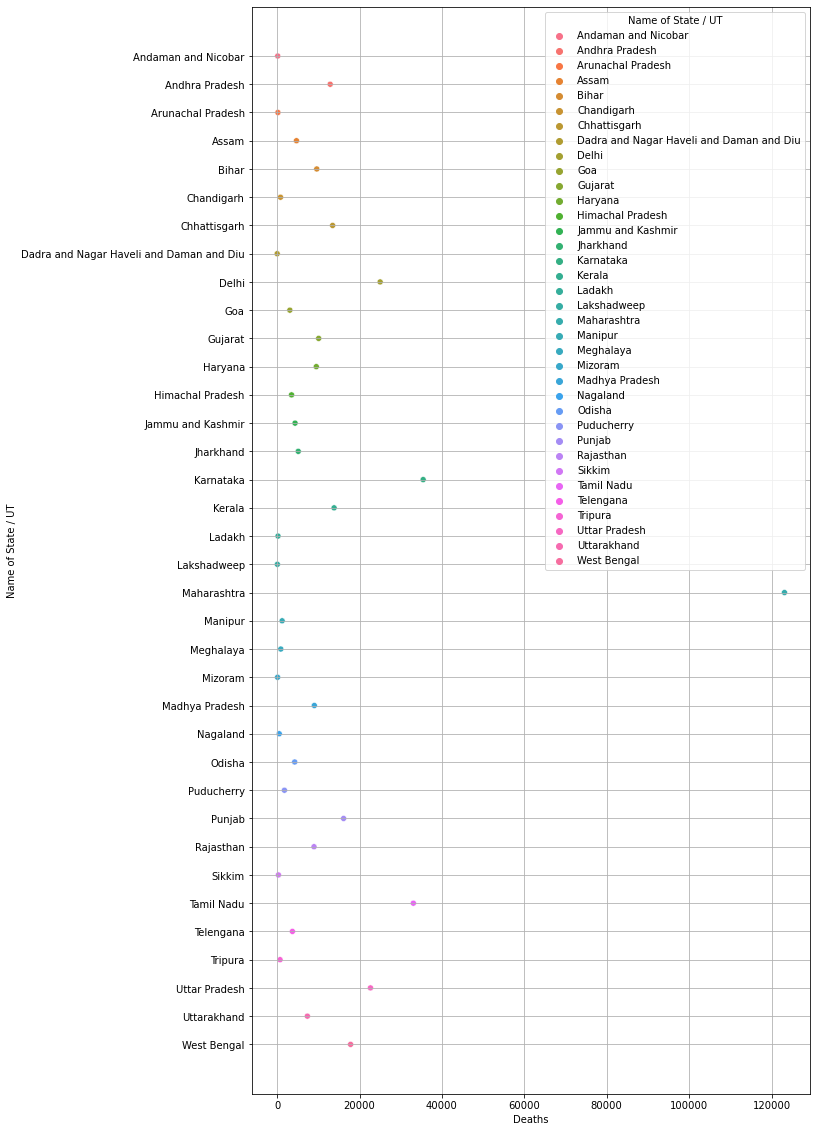

In [7]:
plt.figure(figsize=(10,20))
sns.scatterplot(data=data,y='Name of State / UT',x="Deaths",hue="Name of State / UT")
plt.grid()
plt.plot()

## VIEWING TOTAL NUMBER OF CURED/DISCHARGED/MIGRATED CASES WITH RESPECT TO EACH STATE

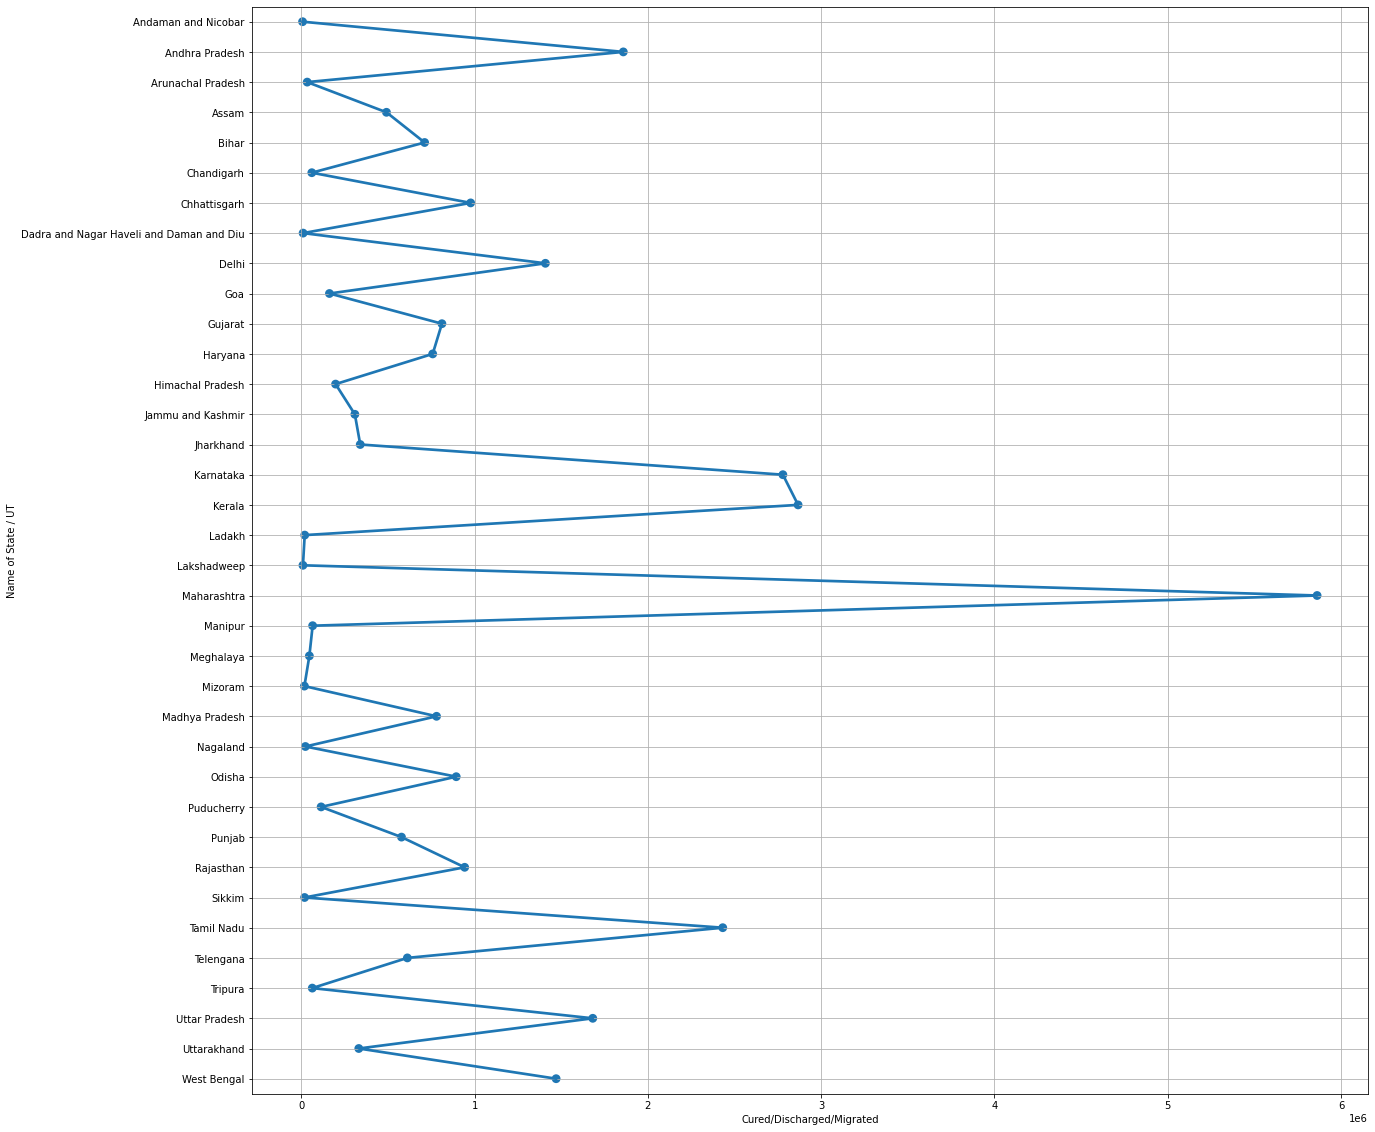

In [9]:
plt.figure(figsize=(20,20))
sns.pointplot(data["Cured/Discharged/Migrated"], data["Name of State / UT"])
plt.grid(True)
plt.show()

## COMPARING DEATH AND CURED/DISCHARGED/MIGRATED CASES WITH RESPECT TO EACH STATE

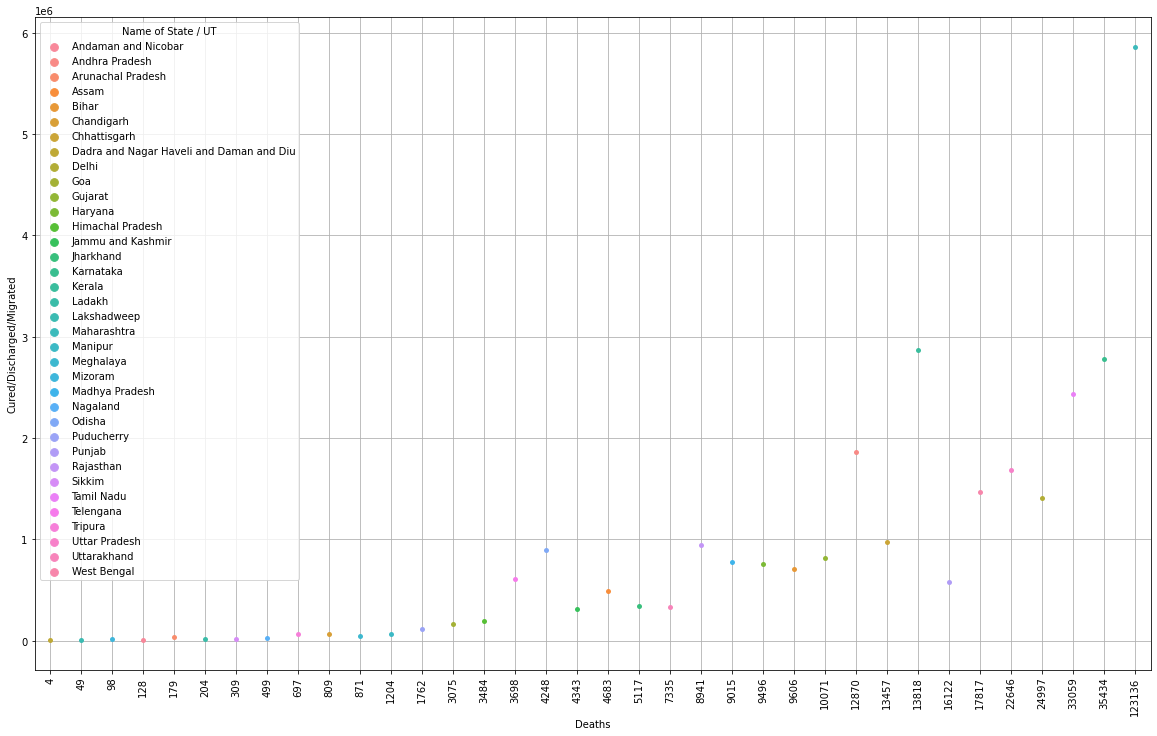

In [11]:
plt.figure(figsize=(20,12))
sns.swarmplot(data['Deaths'],data["Cured/Discharged/Migrated"], data["Name of State / UT"])
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## CORRELATION

In [22]:
corr=data.corr()
corr

,S. No.,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
S. No.,1.000000,0.016954,0.075939,0.083008,0.075077
Active Cases,0.016954,1.000000,0.881638,0.755211,0.885470
Cured/Discharged/Migrated,0.075939,0.881638,1.000000,0.919511,0.999945
Deaths,0.083008,0.755211,0.919511,1.000000,0.920951
Total Confirmed cases,0.075077,0.885470,0.999945,0.920951,1.000000


## HEATMAP

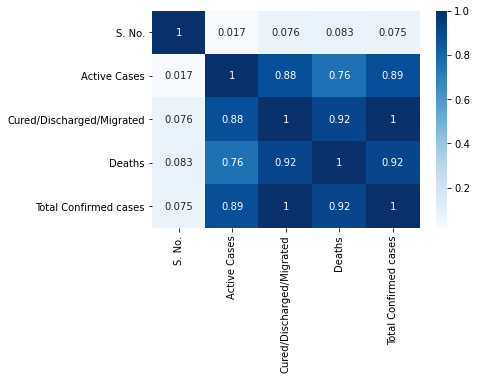

In [23]:
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

## USING PAIR PLOT TO SHOW THE RELATION

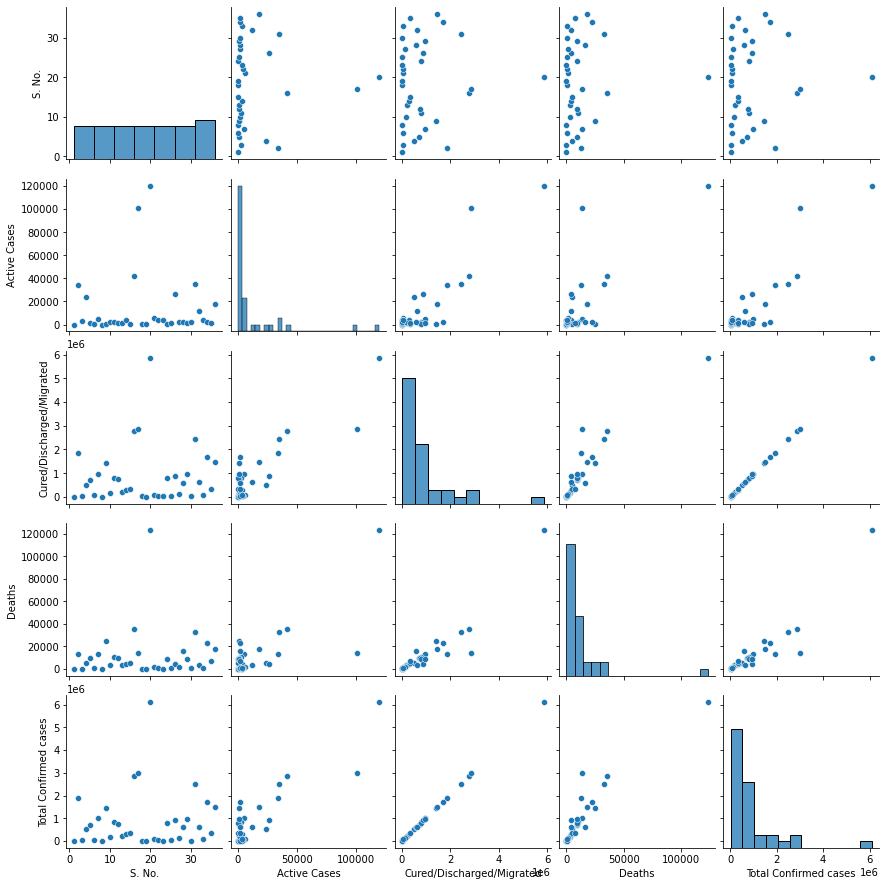

In [12]:
sns.pairplot(data)

# DATASET SHOWING US THE COVID19 STATUS FROM 30th JANUARY 2020 TO 4th AUGUST 2020 

# READING & CLEANING OF DATA

In [23]:
df=pd.read_csv("patients_data.csv")
df.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
0,1,KL-TS-P1,30-01-20,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,NaN,India,Imported,14-02-20,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
1,2,KL-AL-P1,02-02-20,NaN,NaN,M,Alappuzha,Alappuzha,Kerala,KL,...,NaN,India,Imported,14-02-20,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
2,3,KL-KS-P1,03-02-20,NaN,NaN,F,Kasaragod,Kasaragod,Kerala,KL,...,NaN,India,Imported,14-02-20,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN
3,4,DL-P1,02-03-20,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,NaN,India,Imported,15-03-20,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN
4,5,TS-P1,02-03-20,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,NaN,India,Imported,02-03-20,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247236 entries, 0 to 247235
Data columns (total 23 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Patient Number                             99793 non-null   object 
 1   State Patient Number                       110759 non-null  object 
 2   Date Announced                             247226 non-null  object 
 3   Estimated Onset Date                       0 non-null       float64
 4   Age Bracket                                108030 non-null  object 
 5   Gender                                     110811 non-null  object 
 6   Detected City                              12052 non-null   object 
 7   Detected District                          238066 non-null  object 
 8   Detected State                             247217 non-null  object 
 9   State code                                 247114 non-null  object 
 10  Current 

## DELETING UNWANTED COLUMNS

In [14]:
df.drop(['Patient Number','State Patient Number','Estimated Onset Date','Source_1','Source_2','Source_3','Entry_ID'], axis=1,inplace=True)
df.head()

,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Notes1,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Backup Notes,Num Cases
0,30-01-20,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,International Travel,NaN,India,Imported,14-02-20,Student from Wuhan,1.0
1,02-02-20,NaN,M,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,International Travel,NaN,India,Imported,14-02-20,Student from Wuhan,1.0
2,03-02-20,NaN,F,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,International Travel,NaN,India,Imported,14-02-20,Student from Wuhan,1.0
3,02-03-20,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",International Travel,NaN,India,Imported,15-03-20,Travel history to Italy and Austria,1.0
4,02-03-20,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",International Travel,NaN,India,Imported,02-03-20,"Travel history to Dubai, Singapore contact",1.0


In [24]:
data.shape

(36, 6)

## Viewing NaN values

In [28]:
df.isna().sum()

Date Announced                                   10
Age Bracket                                  139206
Gender                                       136425
Detected City                                235184
Detected District                              9170
Detected State                                   19
State code                                      122
Current Status                                   12
Notes                                        139573
Notes1                                       230000
Contracted from which Patient (Suspected)    245313
Nationality                                  245682
Type of transmission                         244246
Status Change Date                           219456
Backup Notes                                 246875
Num Cases                                        13
dtype: int64

## FILLING NAN VALUES

In [43]:
df.replace(np.nan,0)

In [30]:
df.isna().sum()

Date Announced                               0
Age Bracket                                  0
Gender                                       0
Detected City                                0
Detected District                            0
Detected State                               0
State code                                   0
Current Status                               0
Notes                                        0
Notes1                                       0
Contracted from which Patient (Suspected)    0
Nationality                                  0
Type of transmission                         0
Status Change Date                           0
Backup Notes                                 0
Num Cases                                    0
dtype: int64

## REPRESENTATION OF COVID-19 CASES WITH RESPECT TO STATES

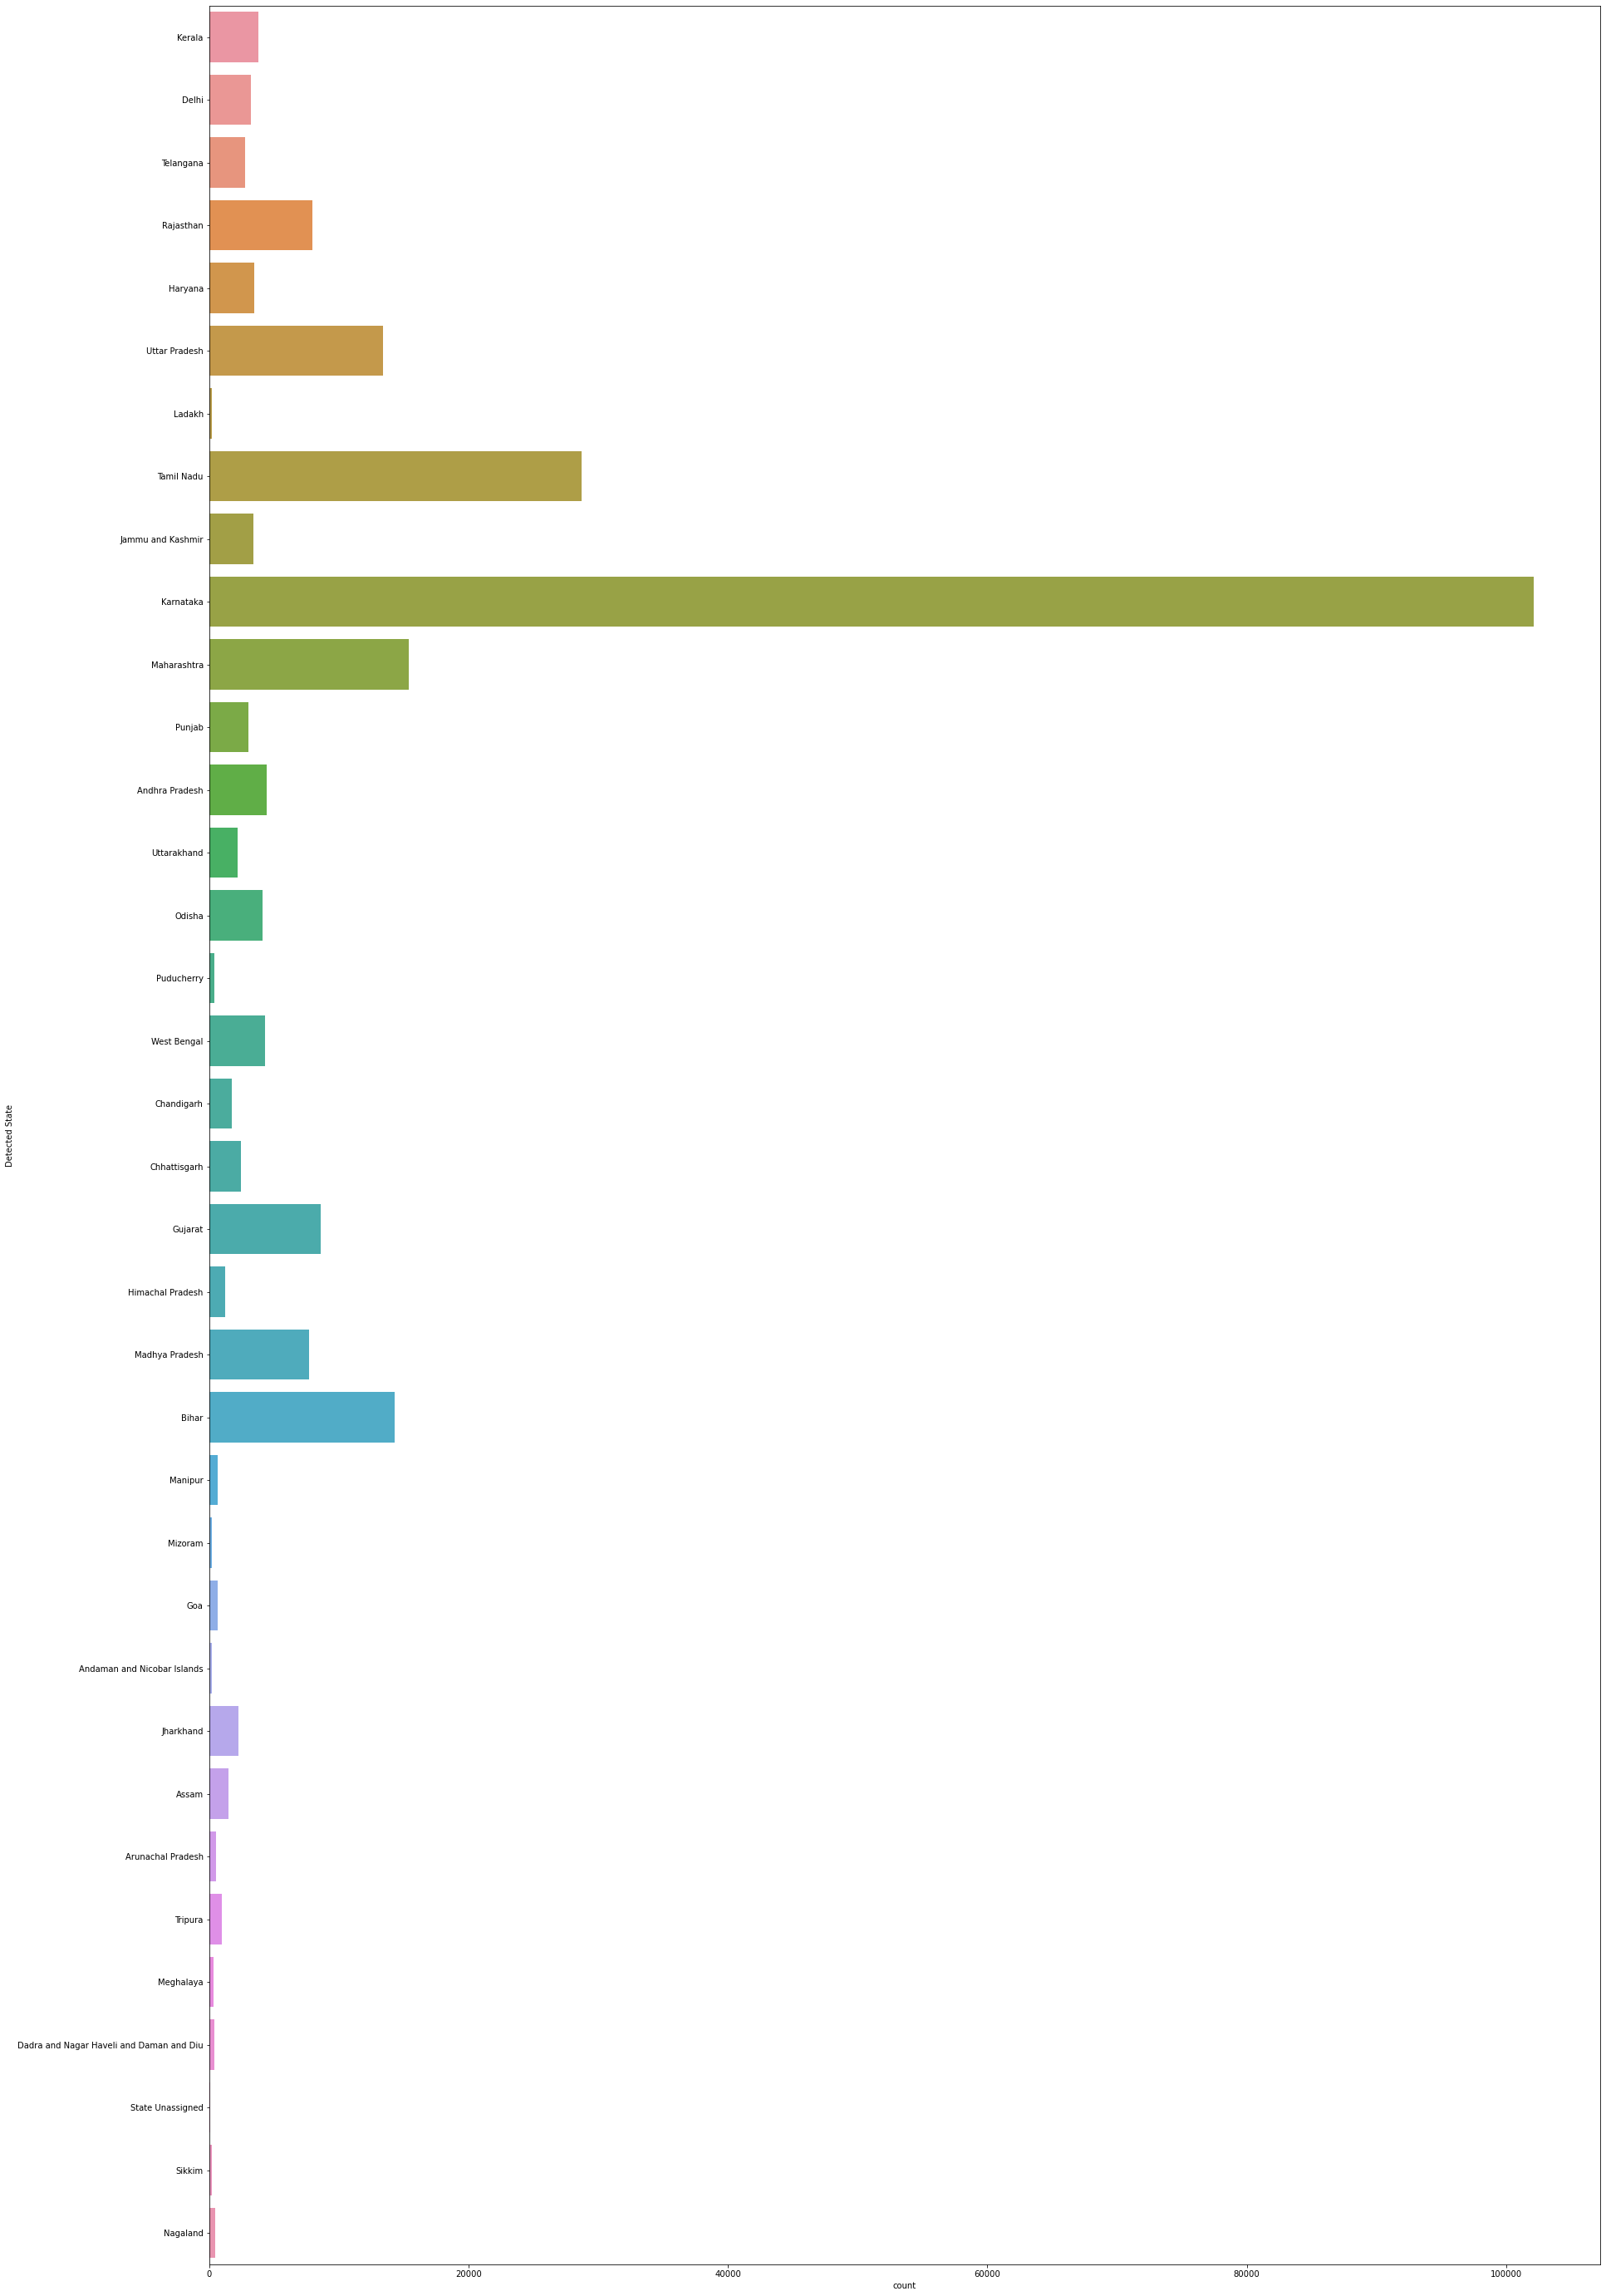

In [15]:
plt.figure(figsize=(30,50))        
sns.countplot(data=df, y="Detected State")
plt.show()

## VIEWING MAXIMUM NUMBER OF COVID-19 CASES WITH RESPECT TO DISTRICT ALONG WITH THE STATE

In [20]:
df.groupby('Detected District')['Detected State'].value_counts().nlargest(15)

Detected District  Detected State
Bengaluru Urban    Karnataka         44366
Chennai            Tamil Nadu        15279
Dakshina Kannada   Karnataka          5307
Kalaburagi         Karnataka          4992
Ballari            Karnataka          4344
Udupi              Karnataka          4342
Mumbai             Maharashtra        3473
Dharwad            Karnataka          3385
Yadgir             Karnataka          3272
Vijayapura         Karnataka          3083
Ahmedabad          Gujarat            2853
Mysuru             Karnataka          2798
Bidar              Karnataka          2600
Uttara Kannada     Karnataka          1947
Hassan             Karnataka          1782
Name: Detected State, dtype: int64

# VIEWING STATUS OF COVID-19 PATIENTS

In [75]:
df['Current Status'].value_counts()

Hospitalized      175515
Recovered          59312
Deceased           12238
Migrated_Other       155
Migrated               4
Name: Current Status, dtype: int64

<AxesSubplot:>

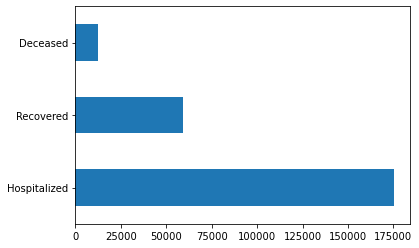

In [76]:
df['Current Status'].value_counts().nlargest(3).plot(kind='barh')

## VIEWING CURRENT STATUS OF THE PATIENTS EFFECTED BY COVID-19 WITH RESPECT TO EACH STATES 

<AxesSubplot:xlabel='count', ylabel='Detected State'>

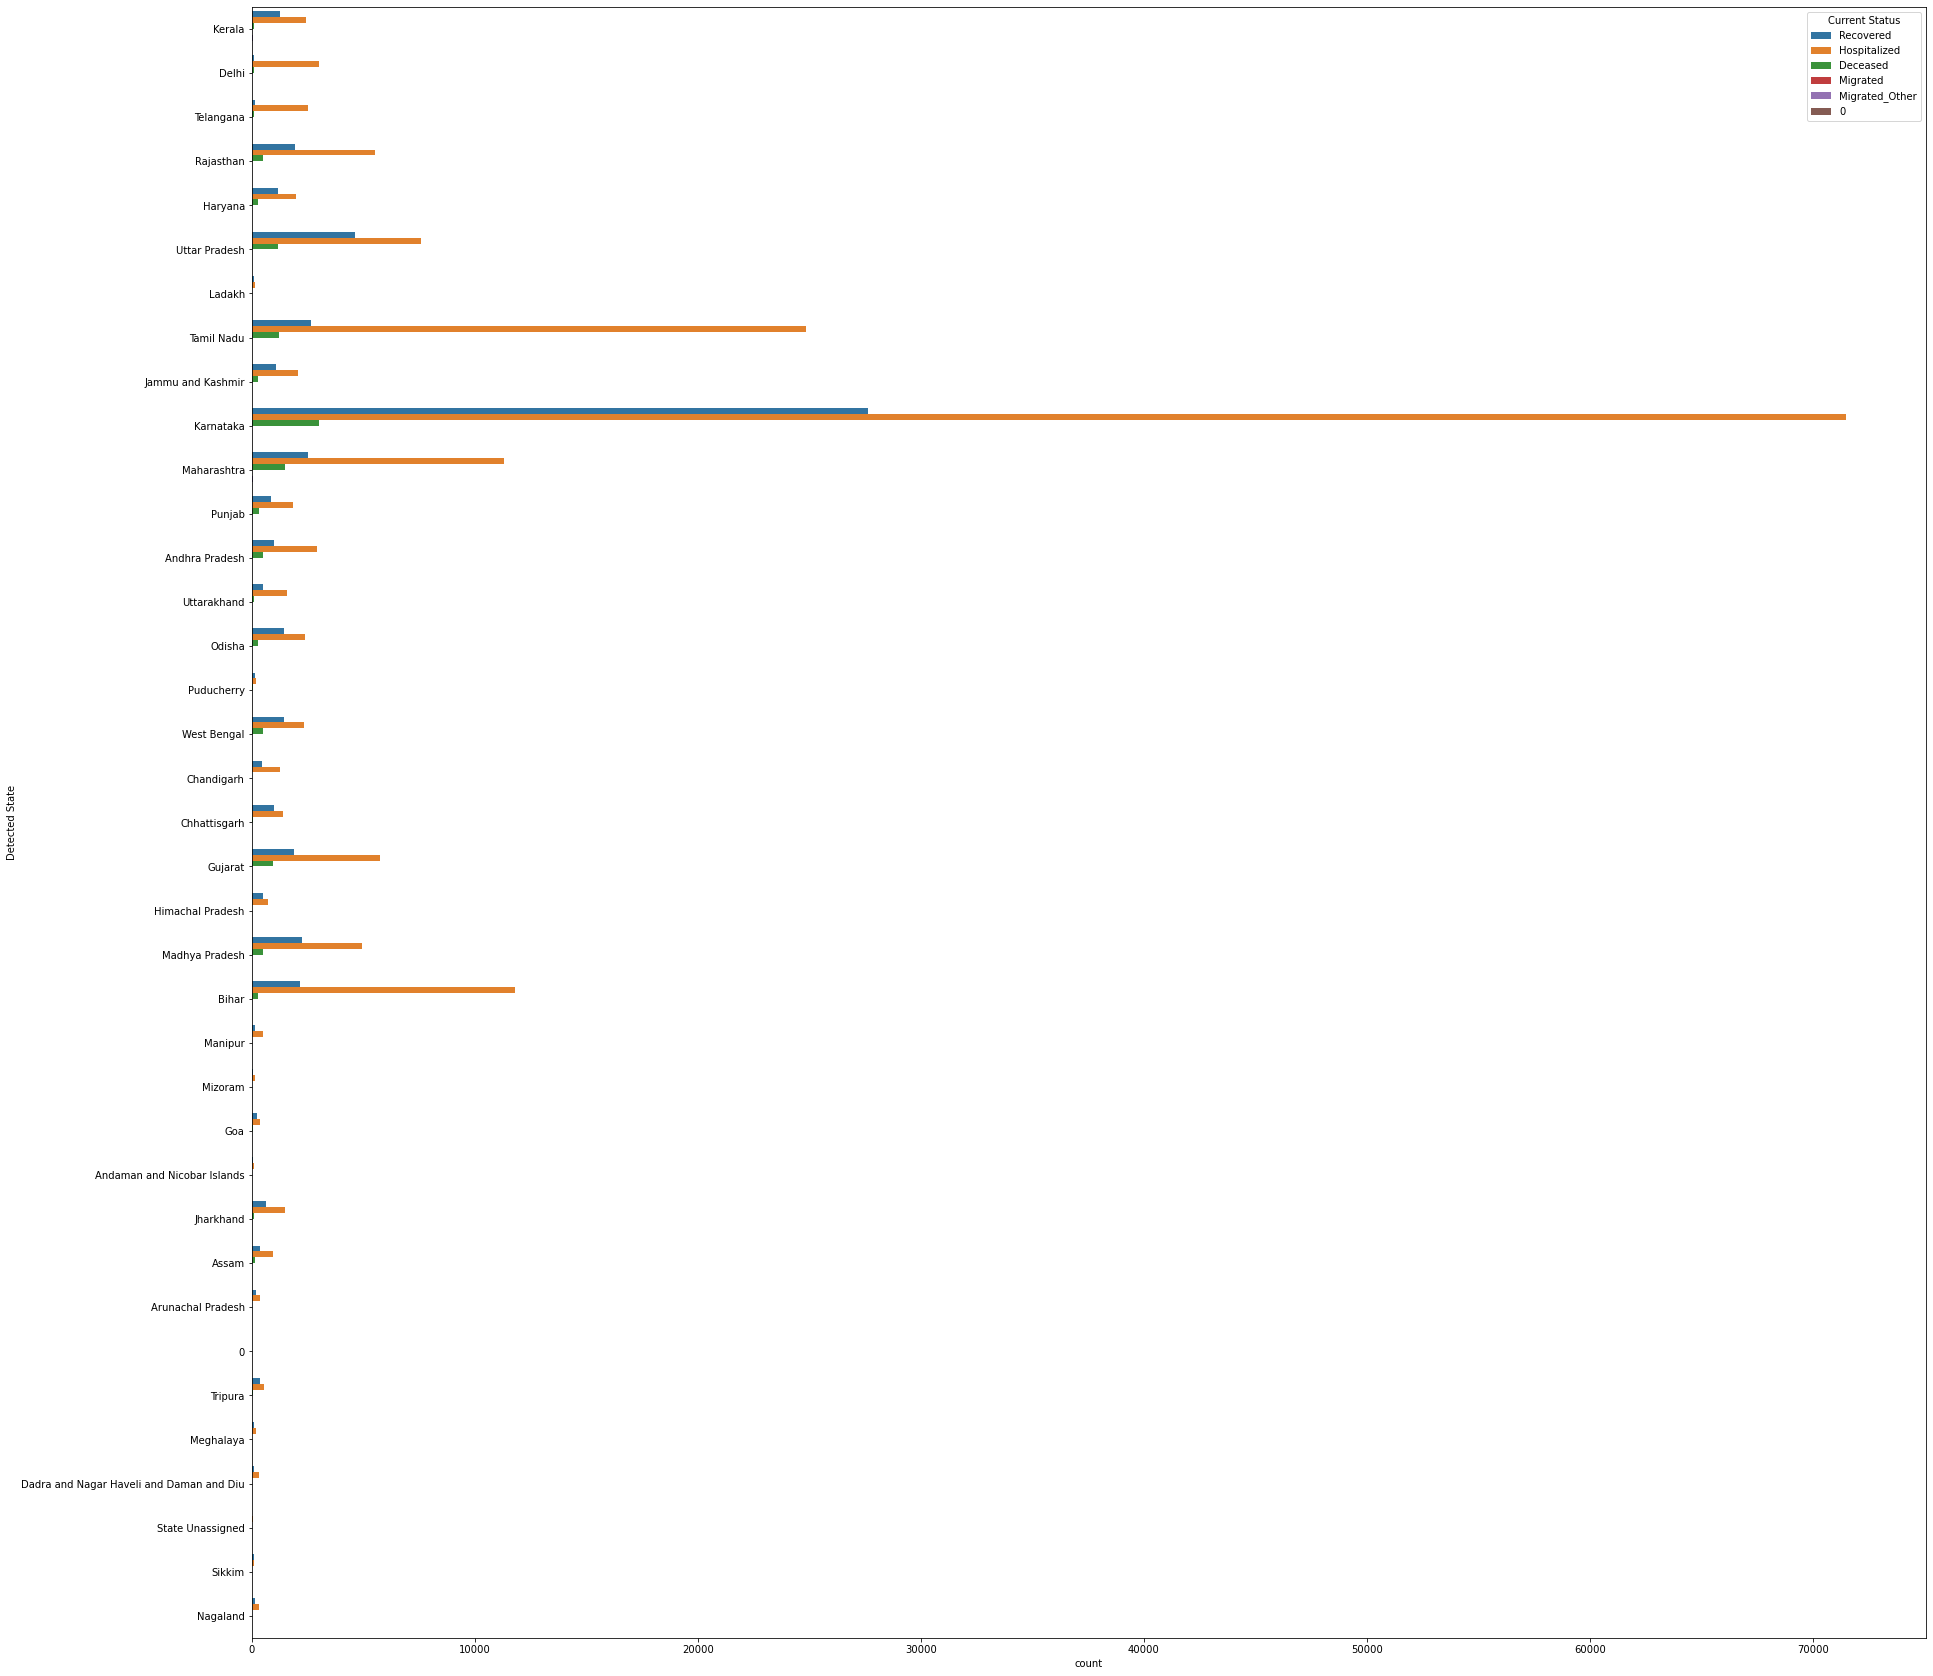

In [34]:
plt.figure(figsize=(30,30))
sns.countplot(data=df,y='Detected State',hue='Current Status')

## VIEWING GENDER OF THE PATIENTS EFFECTED BY COVID-19

In [73]:
df['Gender'].value_counts()

M             0.653022
F             0.346807
Non-Binary    0.000162
M             0.000009
Name: Gender, dtype: float64

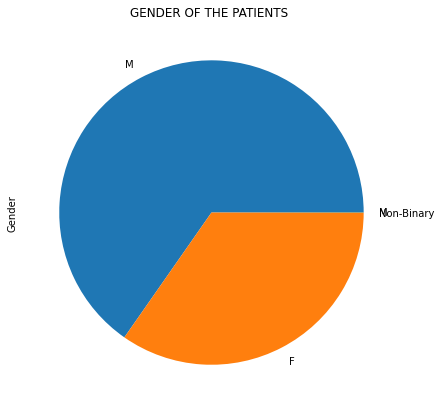

In [49]:
plt.figure(figsize=(7,7))
df['Gender'].value_counts().plot.pie()
plt.title("GENDER OF THE PATIENTS ")
plt.show()

## VIEWING AGE OF THE PATIENTS EFFECTED BY COVID-19

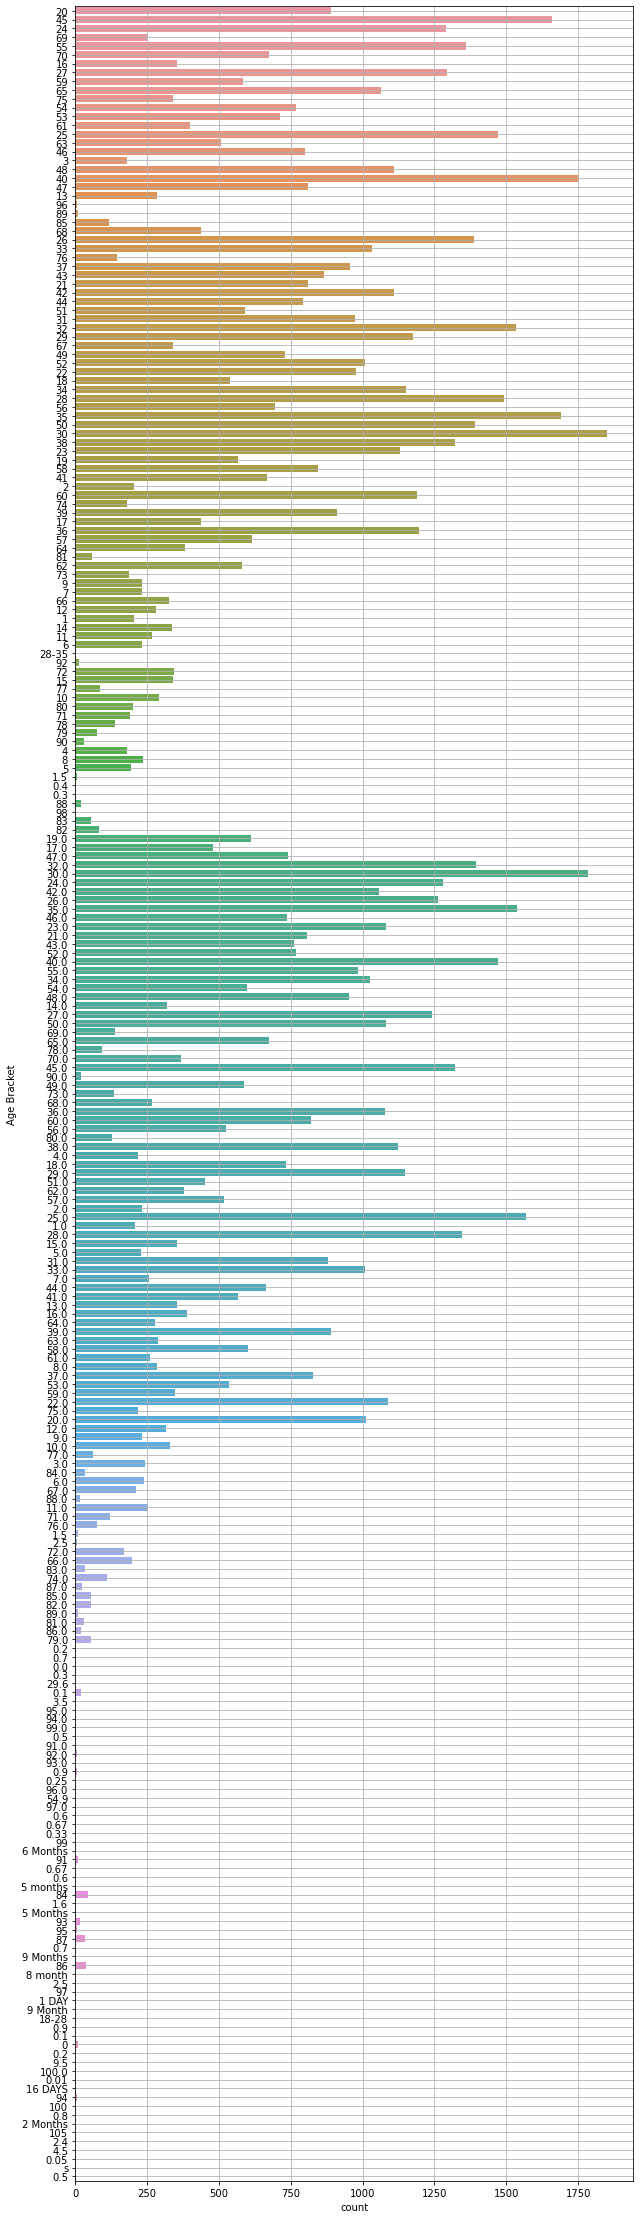

In [54]:
plt.figure(figsize=(10,40))         
sns.countplot(data=df,y='Age Bracket')
plt.grid(True)
plt.show()

In [55]:
df['Age Bracket'].value_counts().nlargest(1) 

30    1849
Name: Age Bracket, dtype: int64

## REPRESENTATION OF PATIENTS NATIONALITY WITH RESPECT TO DETECTED STATES

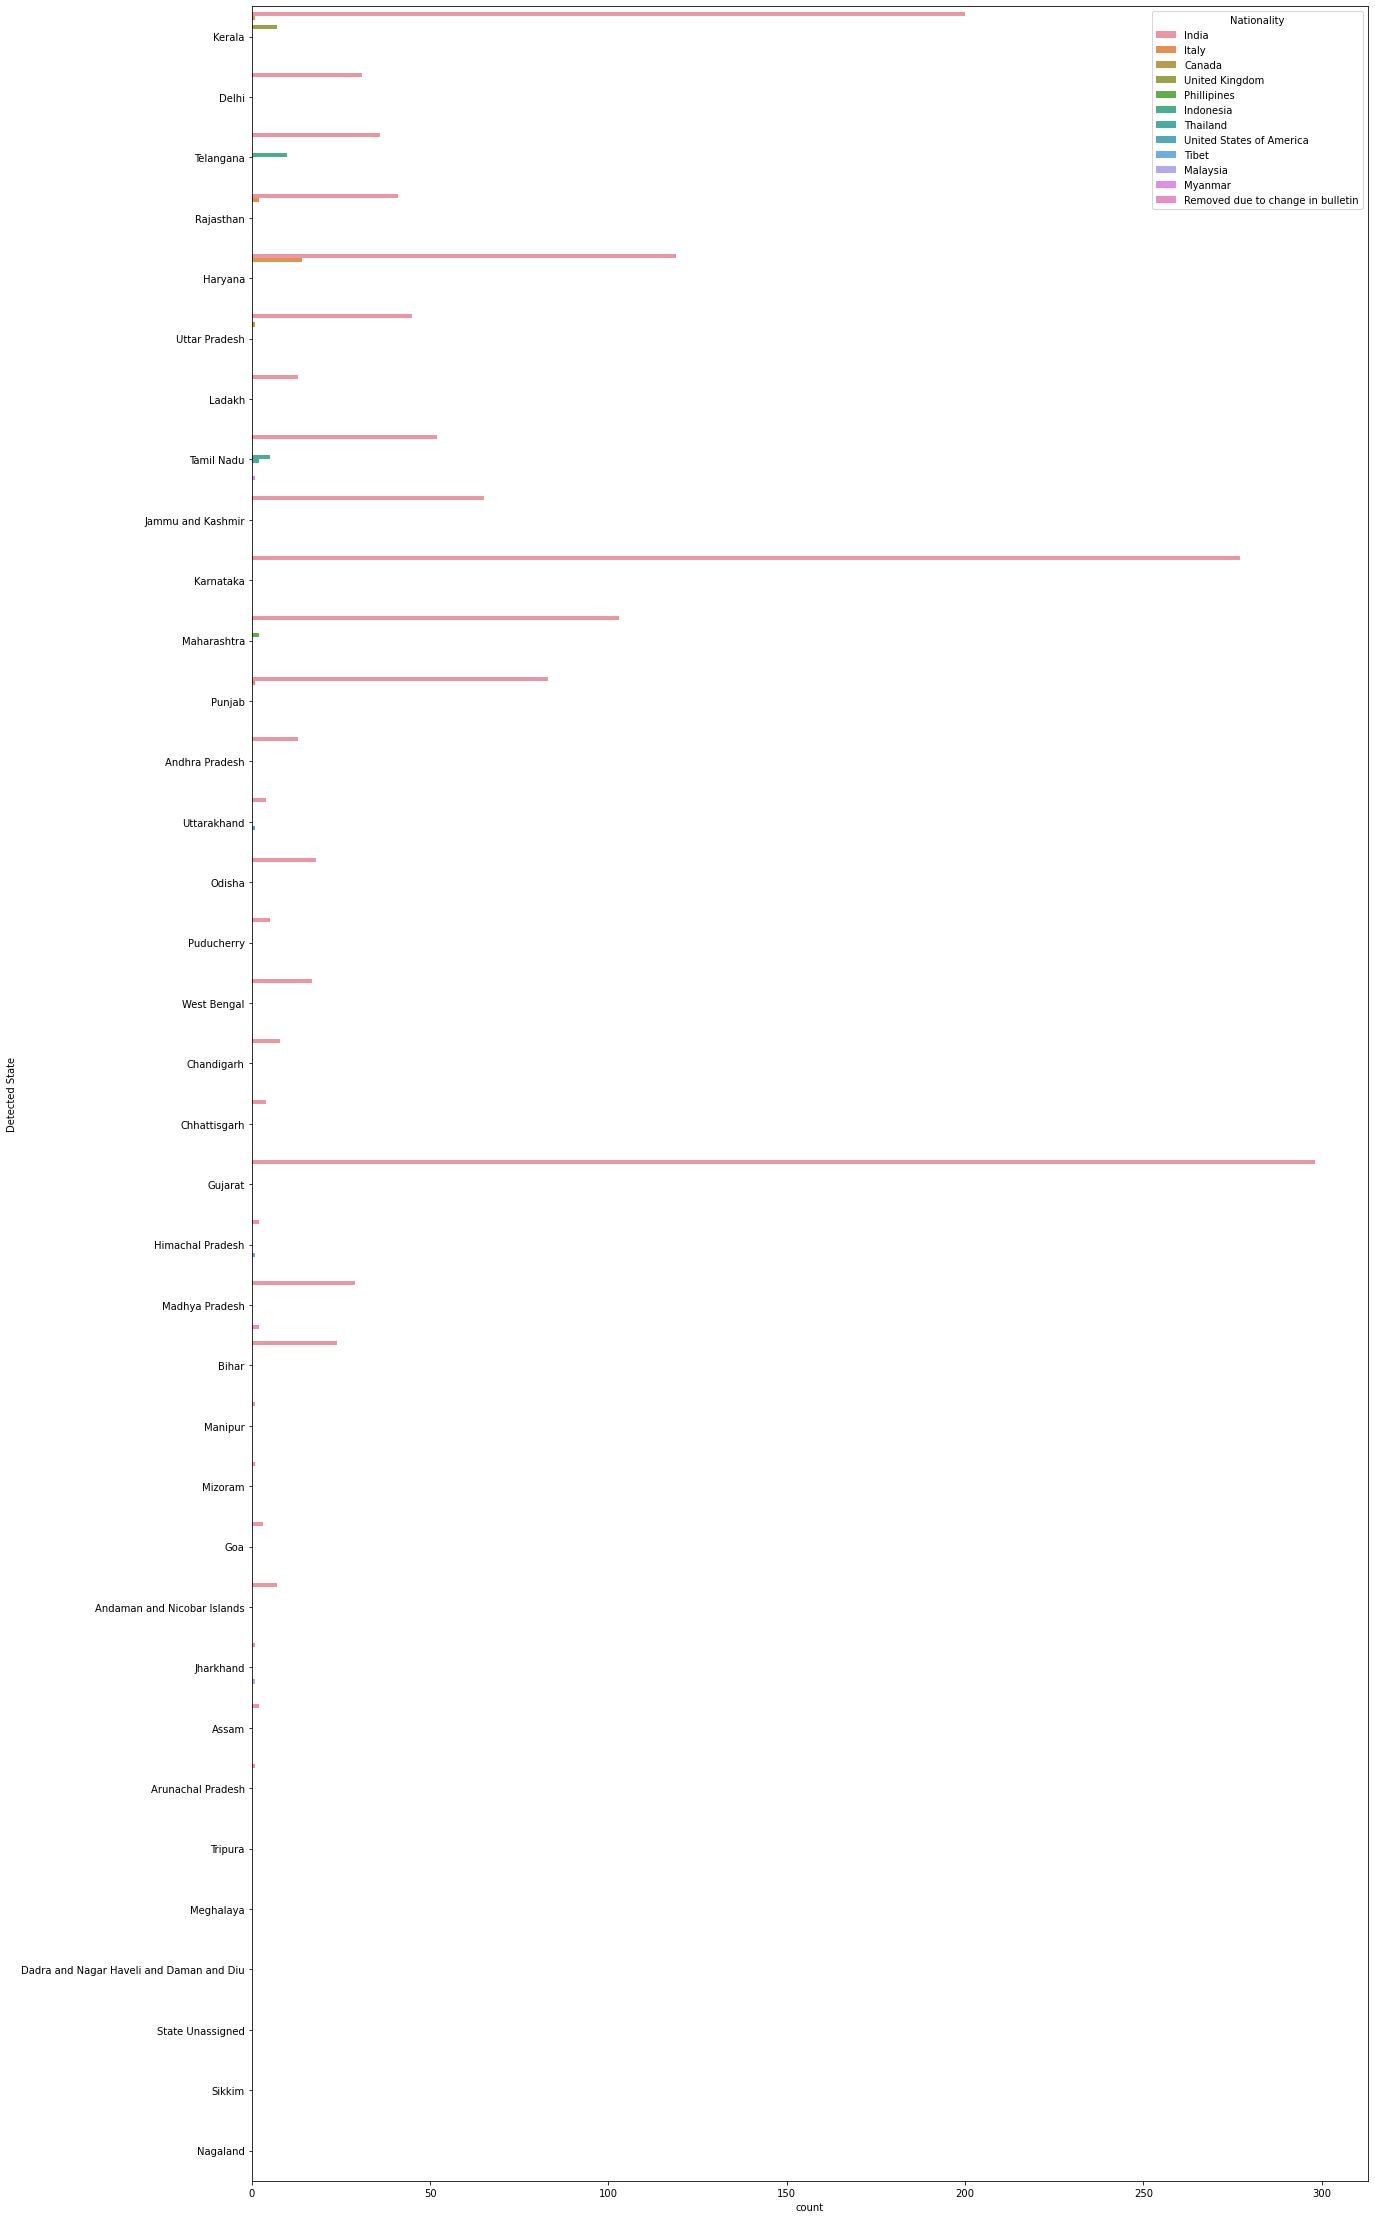

In [59]:
plt.figure(figsize=(20,40))        
sns.countplot(data=df, y="Detected State", hue='Nationality')
plt.show()

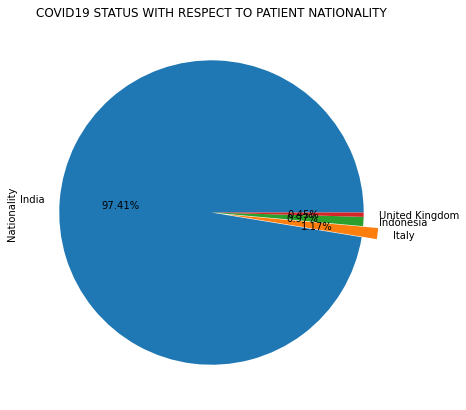

In [74]:
plt.figure(figsize=(7,7))
df['Nationality'].value_counts().nlargest(4).plot(kind='pie',explode=(0,0.1,0,0),autopct=("%1.2f%%"))
plt.title("COVID19 STATUS WITH RESPECT TO PATIENT NATIONALITY")
plt.show()

## REPRESENTATION OF THE TYPE OF TRANSMISSION 

(array([0, 1, 2]),
 [Text(0, 0, 'Local'), Text(1, 0, 'TBD'), Text(2, 0, 'Imported')])

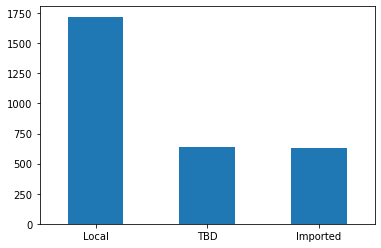

In [77]:
df['Type of transmission'].value_counts().nlargest(3).plot(kind='bar')
plt.xticks(rotation=360)

In [19]:
df.groupby('Detected State')['Type of transmission'].value_counts().nlargest(20)

Detected State  Type of transmission
Tamil Nadu      Local                   578
Kerala          Imported                219
Maharashtra     TBD                     217
Karnataka       Local                   189
Uttar Pradesh   Local                   157
Gujarat         Local                   112
Kerala          Local                   111
Rajasthan       Local                    84
Andhra Pradesh  Local                    77
Punjab          Local                    72
Delhi           TBD                      69
Karnataka       Imported                 68
Madhya Pradesh  TBD                      65
Maharashtra     Imported                 61
                Local                    55
Delhi           Local                    48
Uttar Pradesh   TBD                      48
Rajasthan       Imported                 44
Kerala          TBD                      43
Rajasthan       TBD                      38
Name: Type of transmission, dtype: int64

## DETAILED VIEW OF COVID-19 TRANSMISSION 

In [68]:
df['Notes1'].value_counts()

Details awaited                                          10611
Travel History-Domestic                                   1242
National Travel                                            992
International Travel                                       581
Details Awaited                                            345
                                                         ...  
SARI;Fever, Breathlessness;HTN;24.07.2020;25.07.2020         1
SARI;Cough. Breathlessness;HTN;05.07.2020;08.07.2020;        1
 aodahaihhii                                                 1
 tkaaavaaaasec                                               1
Contact ofP-23,111                                           1
Name: Notes1, Length: 1226, dtype: int64

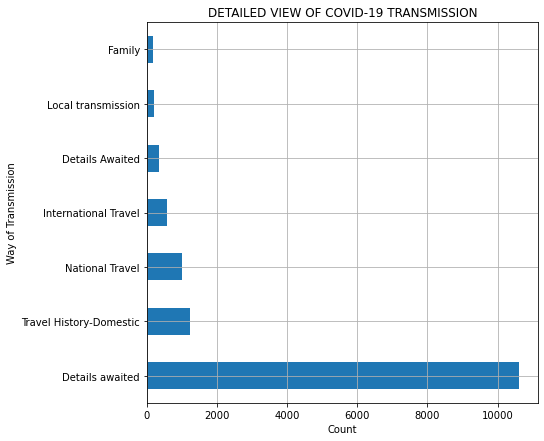

In [27]:
plt.figure(figsize=(7,7))
df['Notes1'].value_counts().nlargest(7).plot(kind='barh')
plt.title("DETAILED VIEW OF COVID-19 TRANSMISSION")
plt.ylabel("Way of Transmission")
plt.xlabel("Count")
plt.grid(True)
plt.show()

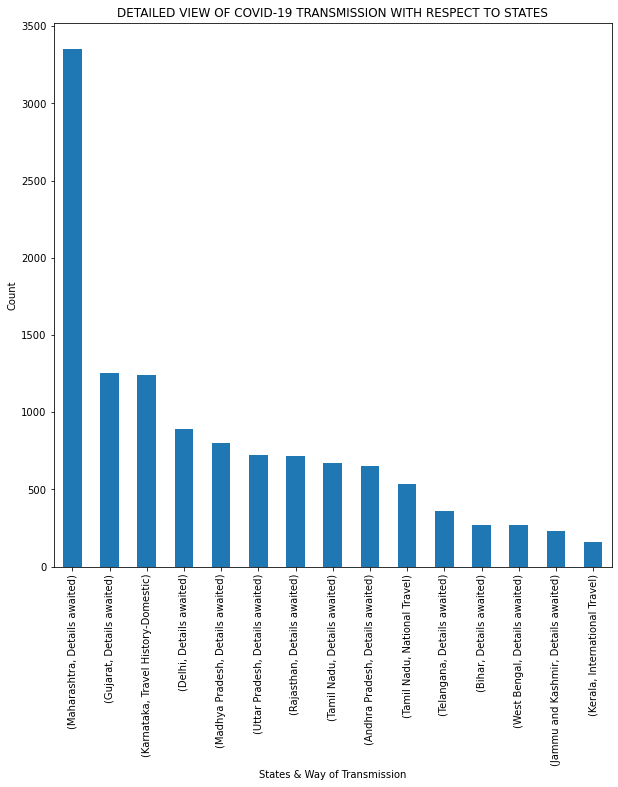

In [28]:
plt.figure(figsize=(10,10))
df.groupby('Detected State')['Notes1'].value_counts().nlargest(15).plot(kind='bar')
plt.title('DETAILED VIEW OF COVID-19 TRANSMISSION WITH RESPECT TO STATES')
plt.xlabel('States & Way of Transmission')
plt.ylabel('Count')
plt.show()

# Conclusion

* From the above project done I have concluded that, currently Maharashtra state is having the highest number of covid cases     along with the higest death and cured cases compared to other states.

* On analysing the COVID-19 cases from January to August 2020, Karnataka state was one of the higest with covid cases. 

* More number of people were hospitalized, with quite a good number of patient recovered with a very less number of people       deceased.

* Male with age 30 were most commonly effected by COVID-19.

* Maximum number of COVID-19 patient were Indian, while very few were from Italy, Canada, UK and many more.

* With respect to analysis done, COVID virus was mainly spread through Local with few spread from international way.

* Covid positive was found mostly with people who travelled with in the country with few number of international travel. while   many cases are yet to be discussed. 

* Through analysis we can see that Karnataka state was higest with COVID patient who travelled domestic.


From above mentioned points, we conclude that in year 2020 Karnataka was higest with COVID-19 cases with most of Male patient with age 30 and the COVID virus was spread mainly through domestic travel. 


## RESULT

In year 2020 Karnataka was higest with COVID-19 cases with most of Male patient with age 30 and the Corona virus was spread mainly through domestic travel.
Currently Maharashtra state is the higest with COVID-19 cases.  


# Thankyou!